# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [4]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [5]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [15]:
reg_tree = DecisionTreeRegressor()
model = reg_tree.fit(X_train, y_train)

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [16]:
y_pred = model.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [17]:
mse = mean_squared_error(y_test, y_pred)
print('Root Mean Squared Error: ', format(np.sqrt(mse),'.3f'))

Root Mean Squared Error:  25739.013


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [33]:
rmses_train_list = [];
rmses_test_list = [];

valList = [5, 10, 15, 20, 100, 1000]
for depth_val in valList:
    deep_reg_tree = DecisionTreeRegressor(max_depth=depth_val)
    deep_model = deep_reg_tree.fit(X_train, y_train)
    y_pred_test = deep_model.predict(X_test)
    y_pred_train = deep_model.predict(X_train)
    rmses_train_list.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmses_test_list.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

rmses_train = np.array(rmses_train_list)
rmses_test = np.array(rmses_test_list)

float64
(6,)


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

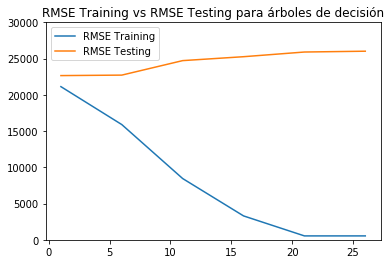

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
model = knn.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [44]:
knn_mse = mean_squared_error(y_test, y_predict)
print('Root Mean Squared Error para KNN: ', format(np.sqrt(knn_mse), '.3f'))

Root Mean Squared Error para KNN:  23290.598


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [46]:
rmses_train_list = []
rmses_test_list = []

for x in range(1, 30):
    knn_neighbors = KNeighborsRegressor(n_neighbors=x)
    model_neighbors = knn_neighbors.fit(X_train, y_train)
    y_pred_test = model_neighbors.predict(X_test)
    y_pred_train = model_neighbors.predict(X_train)
    rmses_train_list.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmses_test_list.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

rmses_train = np.array(rmses_train_list)
rmses_test = np.array(rmses_test_list)

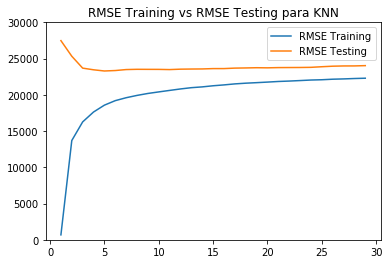

In [47]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [55]:
regressor = DecisionTreeRegressor(max_depth=5)
model = regressor.fit(X_train, y_train)
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print('Root Mean Squared Error: ', format(np.sqrt(mse), '.3f'))

Root Mean Squared Error:  22655.820


In [57]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [59]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = []
for score in scores:
    rmse = nmsq2rmse(score)
    rmse_scores.append(rmse)
    print('Root Mean Squared Error: ', format(rmse, '.4f'))

Root Mean Squared Error:  22138.3430
Root Mean Squared Error:  22438.0697
Root Mean Squared Error:  22849.9288
Root Mean Squared Error:  22753.0184
Root Mean Squared Error:  20954.8198
Root Mean Squared Error:  21109.5361
Root Mean Squared Error:  22195.3868
Root Mean Squared Error:  21316.4171
Root Mean Squared Error:  21668.8214
Root Mean Squared Error:  23317.0546


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [60]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [61]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [62]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,145000.000,140488.357,4511.643
1,110000.000,118638.056,8638.056
2,135000.000,152139.331,17139.331
3,74000.000,85556.343,11556.343
4,115000.000,84919.116,30080.884
5,82000.000,85556.343,3556.343
6,85000.000,117993.713,32993.713
7,158000.000,136541.042,21458.958
8,124900.000,152139.331,27239.331
9,80000.000,152139.331,72139.331
